<img src='https://fontmeme.com/permalink/230311/7478b84bc87336192c57b84df07e9ea1.png'>

<img src='https://fontmeme.com/permalink/230311/9c54147e3ecf5e8ee8fd99bf1794ba37.png'>

<img src="https://www.tourtuscany.com/files/2021/02/DSC6433.jpg" width = 500 align="center">

**Importing libraries and loading data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = 'winemag-data-130k-v2.csv'

In [3]:
df = pd.read_csv(file)

I will create a copy of the dataset that I will call "wine" and that I will use for my analysis, in order to keep the original dataset unmodified and correct.

In [4]:
wine = df.copy()

**Data exploration**

In [5]:
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [6]:
wine.shape

(129971, 14)

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


The are only 3 numeric variables: "Unnamed: 0", "points", "price".

In [8]:
wine.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [9]:
wine.title.describe()

count                                                129971
unique                                               118840
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                     11
Name: title, dtype: object

**Cleaning data**

I delete some columns that I believe are not useful for the purpose of this analysis.

In [10]:
wine = wine.drop(columns=['description','region_1','region_2','taster_name','taster_twitter_handle'])

In [11]:
wine.duplicated().sum()

0

The fact that the dataset appears to be without duplicates could be explained by the presence of the first column that associate an unique integer to each record.

In [12]:
wine=wine.drop(columns=['Unnamed: 0'])
wine.duplicated().sum()

10084

Actually there are more than 10000 duplicated rows. Let's delete them:

In [13]:
wine = wine.drop_duplicates()

In [14]:
wine.reset_index(inplace=True)

Now we have a clean dataset:

In [15]:
wine.head()

,index,country,designation,points,price,province,title,variety,winery
0,0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Let's take a look about some general characteristics of the differents wines:

In [16]:
wine.describe()

,index,points,price
count,119887.000000,119887.000000,111495.000000
mean,63194.838106,88.442158,35.622916
std,37505.636029,3.093431,42.112669
min,0.000000,80.000000,4.000000
25%,30478.500000,86.000000,17.000000
50%,62378.000000,88.000000,25.000000
75%,95374.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


There are 119887 rewieved wines in total. 
On average the wines got 88.5 points out of 100, the minimum is 80 and the maximum is 100. So there are some excellences, but in general all the wines has received a good evaluation. 
The average price of a wine bottle is 35.6, the minimum is 4 and the maximum 3300, so the price vary pretty much.

**ANALYSIS**

I would like to structure the analysis by dividing it into 6 parts, where the first 5 correspond to some wines' characteristics, and the last one is a focus on the strategy that I suggest to use to create a selection of the wines for the marketplace.

**Table of contents:**<br>
**1. Points**<br>
**2. Prices**<br>
**3. Countries and provinces**<br>
**4. Varieties**<br>
**5. Wineries and vineyards**<br>
**6. Strategy**

**1. Points**

I will start by analysing the wine's score. I would like to know how the points are distributed and which are the best rated wines.

In [17]:
wine.points.describe()

count    119887.000000
mean         88.442158
std           3.093431
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

The average score is 88.4, which is pretty high, considering that the maximum is 100. The lowest score is 80 which is still a great score, then, we can say that the reviewed wines are generally really good.<br>
The mean is close to the median, I then imagine that the points are normally distributed, but I will verify it in the following graph:

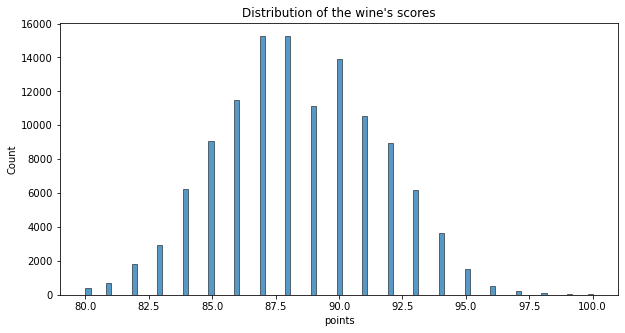

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(data = wine, x = 'points')
plt.title("Distribution of the wine's scores")
plt.show()

Indeed the data of the graph have a distribution that is similar to the normal distribution. The points smoothly increase between 80, the minimum, and 87 and then they slightly decrease from 90, until they reach the maximum (100).

Which are the wines that received the maximum score?

In [19]:
best_score = wine[wine.points == 100]
print(best_score.shape)
best_score

(19, 9)


,index,country,designation,points,price,province,title,variety,winery
345,345,Australia,Rare,100,350.0,Victoria,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
7305,7335,Italy,Occhio di Pernice,100,210.0,Tuscany,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
35755,36528,France,Brut,100,259.0,Champagne,Krug 2002 Brut (Champagne),Champagne Blend,Krug
38378,39286,Italy,Masseto,100,460.0,Tuscany,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
41175,42197,Portugal,Barca-Velha,100,450.0,Douro,Casa Ferreirinha 2008 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha
44537,45781,Italy,Riserva,100,550.0,Tuscany,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
44554,45798,US,NaN,100,200.0,California,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale
56288,58352,France,NaN,100,150.0,Bordeaux,Château Léoville Barton 2010 Saint-Julien,Bordeaux-style Red Blend,Château Léoville Barton
84850,89728,France,Cristal Vintage Brut,100,250.0,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
84851,89729,France,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon


19 wines got the highest score, 100 out of 100. They could be considered the best wines in the world.<br> Later on, I will analyse more these wines in order to find which countries and provinces produce them, what is their price and so on.<br>
Now I want to know something more about the prices of all the reviewed wines.

**2. Wine's prices**

In [20]:
wine.price.describe()

count    111495.000000
mean         35.622916
std          42.112669
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

We can see that the mean (35.6) is higher than the median (25), most of the prices are lower than 42 and between the minimum (4) and the maximum (3300) there is a very big difference. These information makes me think that the price's data may be right skewed or that there could be outliers. Let's then plot the prices to see their distribution, but instead of plotting the raw data I will apply the logarithm function to them in order to improve the readability of the graph.

In [21]:
wine['price_log'] = np.log(wine.price)

In [22]:
wine['price_log'].describe()

count    111495.000000
mean          3.317008
std           0.659284
min           1.386294
25%           2.833213
50%           3.218876
75%           3.737670
max           8.101678
Name: price_log, dtype: float64

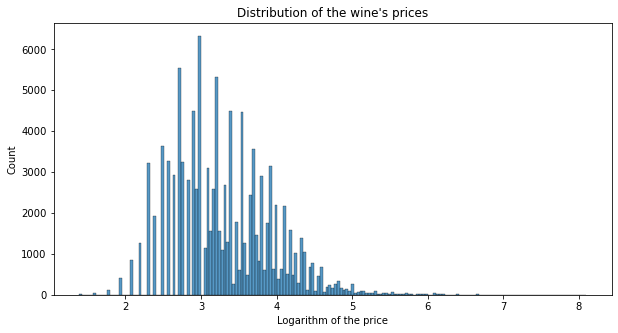

In [23]:
plt.figure(figsize = (10,5))
sns.histplot(wine['price_log'].dropna())
plt.title("Distribution of the wine's prices")
plt.xlabel("Logarithm of the price")
plt.show()

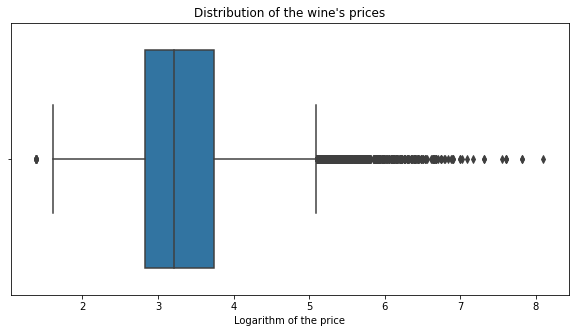

In [24]:
plt.figure(figsize = (10,5))
sns.boxplot(data = wine, x = 'price_log')
plt.title("Distribution of the wine's prices")
plt.xlabel("Logarithm of the price")
plt.show()

As suspected the price's distribution is right-skewed, and there are a lot of outliers, i.e. there are some prices that are significantly higher than the others.<br>
I want to know something more about these outliers, let's see the top 20 of the most expensive wines:

In [25]:
exp_wine = wine.sort_values(by = 'price',ascending = False).head(20)
exp_wine

,index,country,designation,points,price,province,title,variety,winery,price_log
76275,80290,France,NaN,88,3300.0,Bordeaux,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,8.101678
92530,98380,France,NaN,96,2500.0,Burgundy,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,7.824046
15712,15840,France,NaN,96,2500.0,Bordeaux,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus,7.824046
111679,120391,US,Roger Rose Vineyard,91,2013.0,California,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair,7.607381
105812,113564,France,NaN,96,2000.0,Burgundy,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,7.600902
62687,65352,France,NaN,97,2000.0,Bordeaux,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus,7.600902
1557,1558,France,NaN,98,1900.0,Bordeaux,Château Margaux 2009 Margaux,Bordeaux-style Red Blend,Château Margaux,7.549609
104278,111753,France,NaN,100,1500.0,Bordeaux,Château Lafite Rothschild 2010 Pauillac,Bordeaux-style Red Blend,Château Lafite Rothschild,7.313220
104280,111755,France,NaN,100,1500.0,Bordeaux,Château Cheval Blanc 2010 Saint-Émilion,Bordeaux-style Red Blend,Château Cheval Blanc,7.313220
1574,1575,France,NaN,96,1300.0,Bordeaux,Château Mouton Rothschild 2009 Pauillac,Bordeaux-style Red Blend,Château Mouton Rothschild,7.170120


Almost every wine in the top 20 is from France, mostly from the region of Bordeaux, and they all have a score above the average, which is 88, but only two received the maximum number of points.<br>
Therefore, what is the cost of the wines with the highest score?

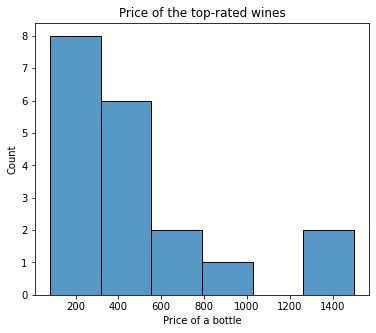

In [26]:
plt.figure(figsize = (6,5))
sns.histplot(data = best_score, x = 'price')
plt.title("Price of the top-rated wines")
plt.xlabel("Price of a bottle")
plt.show()

The wines that received the best score have a medium to high price. Most of the best bottles costs between 200 and 400.<br> In compliance with the previous consideration on the top 20, the most expensive wines (price over 1500) don't figure in the best reviewed ones.

However I suspect that these results are the effect of the outliers and I think that there could actually be a correlation between the price of a bottle and his score.

<Figure size 1080x360 with 0 Axes>

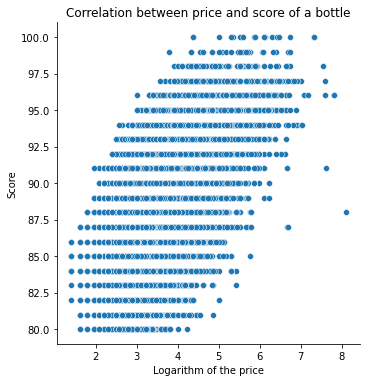

In [27]:
plt.figure(figsize = (15,5))
sns.relplot(data = wine, x = 'price_log', y = 'points')
plt.title("Correlation between price and score of a bottle")
plt.xlabel("Logarithm of the price")
plt.ylabel("Score")
plt.show()

In fact the graph shows that there is a correlation between the price of a bottle of wine and his score, but the price range is pretty big for each score. <br> Accordingly, we can find both expensive and cheap wines with really good review, but generally the ones that received higher scores have a higher price than the average.

**3. Country & province**

In this section I want to know the origin of the wines, in term of countries and provinces, when possible.<br> More particularly I want to find out information like which countries have the biggest winery production, where the best wines are made and which state has the highest prices.

Where do the reviewed wines come from?

In [28]:
wine.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

Now let's see the top 15 of the countries that produce more wine:

In [29]:
country = wine.country.value_counts().head(15)

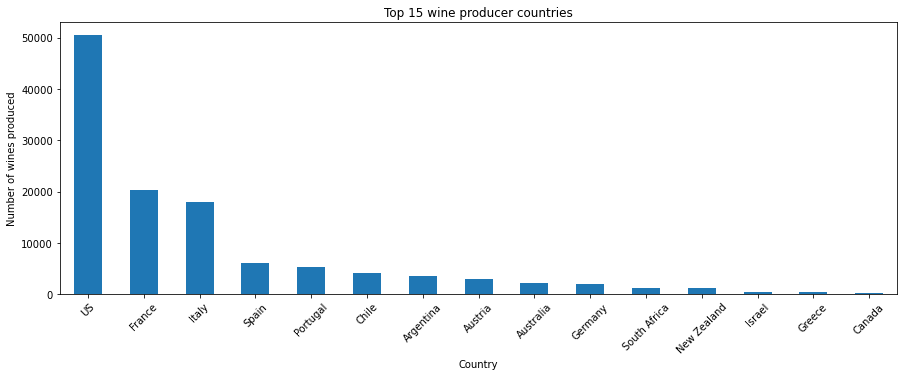

In [30]:
plt.figure(figsize = (15,5))
country.plot.bar()
plt.title("Top 15 wine producer countries")
plt.xlabel("Country")
plt.ylabel("Number of wines produced")
plt.xticks(rotation = 45)
plt.show()

The largest producer of wine of the world is the United States, followed by France and Italy.

I want now to analyse deeper wine's points and prices, according to the country of production. Let's start with the average score of the wines.

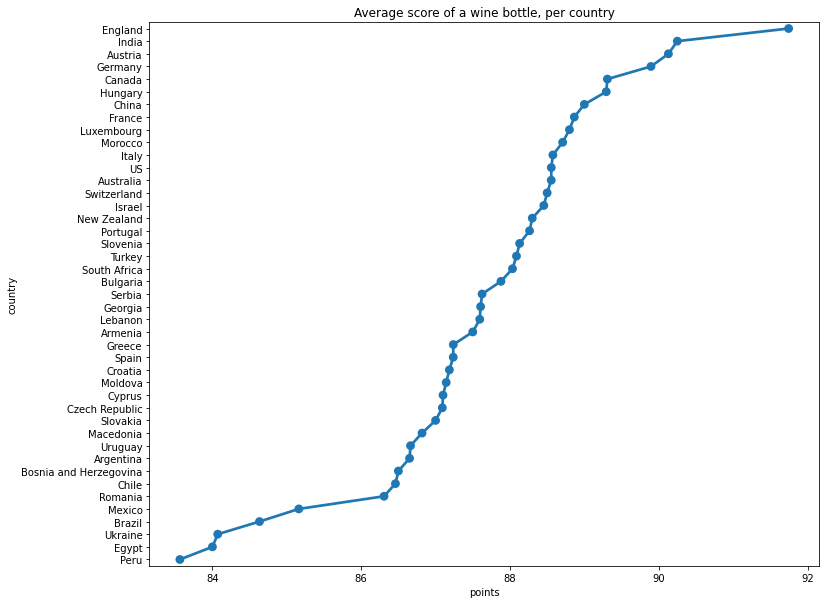

In [31]:
test = wine.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()
plt.figure(figsize = (12,10))
sns.pointplot(x = test.points, y = test.index)
plt.title("Average score of a wine bottle, per country")
plt.show()

England seems to be the best wine producer country, followed by India and Austria. However, even if they certainly have very good wines, neither England nor India figure in the 15 largest producer countries. Let's analyse the score of the 15 countries that produce most of the wine in the world.

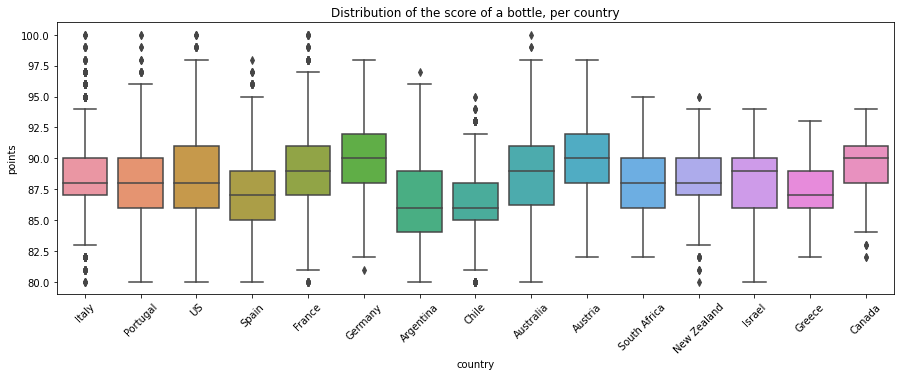

In [32]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'country', y = 'points', data=wine[wine.country.isin(country.index.values)])
plt.title("Distribution of the score of a bottle, per country")
plt.xticks(rotation = 45)
plt.show()

Now let's analyse the prices in each country:

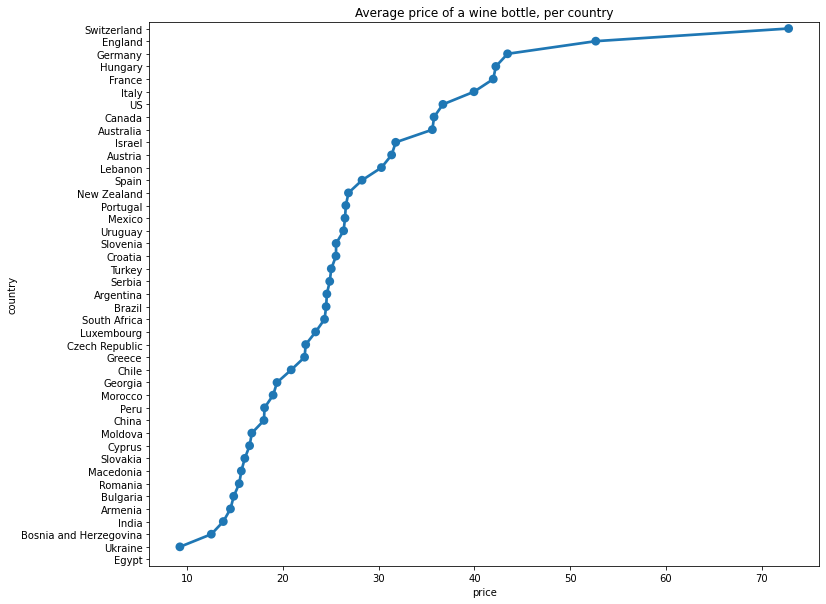

In [33]:
test = wine.groupby(['country',]).mean()['price'].sort_values(ascending=False).to_frame()
plt.figure(figsize = (12,10))
sns.pointplot(x = test['price'] ,y = test.index)
plt.title("Average price of a wine bottle, per country")
plt.show()

Let's see the distribution of the wines' prices of the 15 largest producer countries :

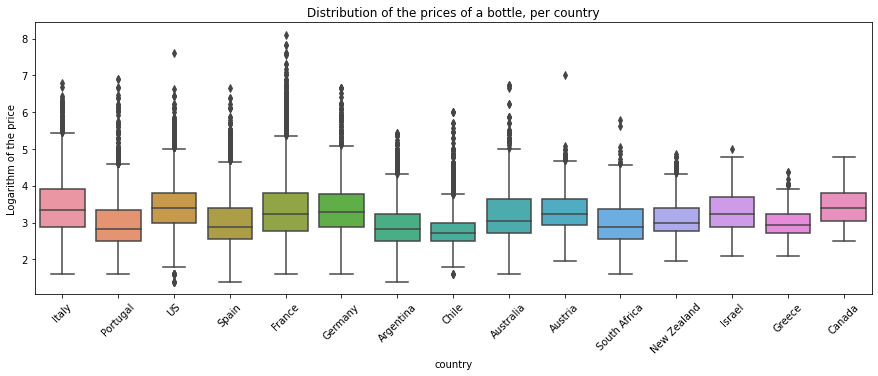

In [34]:
plt.figure(figsize = (15,5))
sns.boxplot(x='country', y='price_log', data=wine[wine.country.isin(country.index.values)])
plt.title("Distribution of the prices of a bottle, per country")
plt.ylabel("Logarithm of the price")
plt.xticks(rotation = 45)
plt.show()

Where are they producing the wines with the highest score?

In [35]:
top_wines = best_score.pivot_table(values = 'points',
                                   index = 'country',
                                   aggfunc='count').sort_values('points', ascending=False)
top_wines

,points
country,
France,8
Italy,4
US,4
Portugal,2
Australia,1


As we could imagine, France is the one that produces most of the best wines, followed by Italy and the United States.
Indeed these three countries are also the ones that has the biggest wine production, as we saw earlier.

I'm curious about the provinces that makes the best wines.

In [36]:
top_province = best_score.pivot_table(values = 'points',
                                   index = 'province',
                                   aggfunc='count').sort_values('points', ascending=False)

In [37]:
top_province

,points
province,
Bordeaux,5
Tuscany,4
Champagne,3
California,2
Washington,2
Douro,1
Port,1
Victoria,1


The province of Bordeaux is on top of the ranking, with 5 wines considered among the bests. France has also another region that produces the best wines, the famous Champagne, while the italian wines all come from the same province, Tuscany, that appears in second place.
Below we find 2 wines from California and 2 from Washington, United States, then the 2 portuguese wines from Douro and Port, and the last wine comes from Victoria, in Australia.

**4. Variety**

In this section I would like to know something about the most produced varieties, the most rated and expensive ones.

First of all, let's see the distribution of the points given to the wines of the 15 most produced varieties.

In [38]:
varieties = wine.variety.value_counts().head(15)

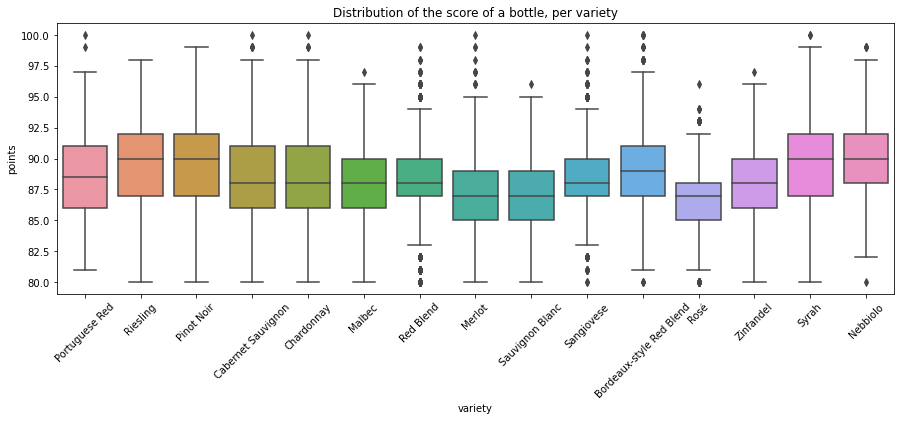

In [39]:
plt.figure(figsize = (15,5))
sns.boxplot(x='variety', y='points', data=wine[wine.variety.isin(varieties.index.values)])
plt.title("Distribution of the score of a bottle, per variety")
plt.xticks(rotation = 45)
plt.show()

The most produced varieties tend to have good score, with the median between 87 and 90. Many of them have wines with the highest score and some of them, in particular Red Blend and Sangiovese, have outliers.

Let's see the varieties of the wines that received the best score.

In [40]:
best_score.pivot_table(values = 'points',
                      index = ['variety'],
                      aggfunc = 'count').sort_values('points',ascending=False)

,points
variety,
Bordeaux-style Red Blend,5
Champagne Blend,2
Syrah,2
Bordeaux-style White Blend,1
Cabernet Sauvignon,1
Chardonnay,1
Merlot,1
Muscat,1
Port,1


Boredeaux-style Red Blend is the most appreciated variety, in fact 5 wines of this variety received the highest score. 

What about the most expensive varieties?

In [41]:
exp_wine['variety'].value_counts()

Bordeaux-style Red Blend      9
Pinot Noir                    4
Port                          2
Bordeaux-style White Blend    2
Grüner Veltliner              1
Chardonnay                    1
Sangiovese Grosso             1
Name: variety, dtype: int64

We can observe that most of the most expensive wines are a Bordeaux-style Red Blend.

In short, Bordeaux-style Red Blend is considered the best variety, and it's one of the most produced ones, but it's also the most expensive in the world.

**5. Vineyard and winery**

Finally, I'm curious about the best vineyard and the best winery of the world.

In [42]:
best_score.pivot_table(values = 'points',
                      index = 'designation',
                      aggfunc = 'count').sort_values(by = 'points',ascending = False)

,points
designation,
Barca-Velha,1
Bionic Frog,1
Brut,1
Cerretalto,1
Cristal Vintage Brut,1
La Muse,1
Le Mesnil Blanc de Blancs Brut,1
Masseto,1
Nacional Vintage,1


Due to the fact that there are more than 35000 null values in the "designation" columns, we only know 13 vineryards of the bottles with the highest score.

Now let's see the best wineries:

In [43]:
best_score.pivot_table(values = 'points',
                      index = 'winery',
                      aggfunc = 'count').sort_values(by = 'points',ascending = False)

,points
winery,
Avignonesi,1
Château Lafite Rothschild,1
Tenuta dell'Ornellaia,1
Salon,1
Quinta do Noval,1
Louis Roederer,1
Krug,1
Château Léoville Las Cases,1
Château Léoville Barton,1


**6. Strategy**

In light of the above, the strategy to create the wine selection that I would suggest for the marketplace should consider two aspects that I will sum up in two keywords: <br> "Variety" and "Accessibility". <br>
Indeed, the selection should include at least one wine of each country of the world, in order to allow the buyers to try wines of different origin and to support every country. Moreover the selection should also include different varieties of wine, different vineyards and different wineries. <br>
Secondly, the marketplace should be accessible to everyone and then sell both cheap and expensive wines, in order to allow everyone to buy a bottle of wine.

Let's see then which are the best wines of each country:

In [44]:
max_points = wine.groupby('country').max('points')

max_points.rename(columns = {'points':'max_points'}, inplace = True)
max_points.drop(columns = ['price','index','price_log'], inplace = True)

wine_max = wine.merge(max_points, how = 'left', on = 'country')

best = wine_max[wine_max['points'] == wine_max['max_points']].sort_values('country')

best_wine = best.groupby(['country','title']).max()

In [45]:
best_wine

index  \
country                title                                                        
Argentina              Bodega Catena Zapata 2006 Nicasia Vineyard Malb...   82754   
Armenia                Van Ardi 2015 Estate Bottled Rosé (Armenia)          66146   
Australia              Chambers Rosewood Vineyards NV Rare Muscat (Rut...     345   
Austria                Kracher 2008 Zwischen den Seen Nummer 9 Trocken...  109406   
Bosnia and Herzegovina Winery Čitluk 2011 Blatina (Mostar)                  96759   
...                                                                           ...   
US                     Cayuse 2008 Bionic Frog Syrah (Walla Walla Vall...  123545   
                       Charles Smith 2006 Royal City Syrah (Columbia V...  113929   
                       Verité 2007 La Muse Red (Sonoma County)             118058   
Ukraine                Koblevo NV Reserve Riesling (Ukraine)                88511   
Uruguay                Bouza 2015 B6 Parcela Única Tannat (Canelones)       14119   

                                                                                                               designation  \
country                title                                                                                                 
Argentina              Bodega Catena Zapata 2006 Nicasia Vineyard Malb...                                 Nicasia Vineyard   
Armenia                Van Ardi 2015 Estate Bottled Rosé (Armenia)                                          Estate Bottled   
Australia              Chambers Rosewood Vineyards NV Rare Muscat (Rut...                                             Rare   
Austria                Kracher 2008 Zwischen den Seen Nummer 9 Trocken...  Zwischen den Seen Nummer 9 Trockenbeerenauslese   
Bosnia and Herzegovina Winery Čitluk 2011 Blatina (Mostar)                                                             NaN   
...                                                                                                                    ...   
US                     Cayuse 2008 Bionic Frog Syrah (Walla Walla Vall...                                      Bionic Frog   
                       Charles Smith 2006 Royal City Syrah (Columbia V...                                       Royal City   
                       Verité 2007 La Muse Red (Sonoma County)                                                     La Muse   
Ukraine                Koblevo NV Reserve Riesling (Ukraine)                                                       Reserve   
Uruguay                Bouza 2015 B6 Parcela Única Tannat (Canelones)                                     B6 Parcela Única   

                                                                           points  \
country                title                                                        
Argentina              Bodega Catena Zapata 2006 Nicasia Vineyard Malb...      97   
Armenia                Van Ardi 2015 Estate Bottled Rosé (Armenia)             88   
Australia              Chambers Rosewood Vineyards NV Rare Muscat (Rut...     100   
Austria                Kracher 2008 Zwischen den Seen Nummer 9 Trocken...      98   
Bosnia and Herzegovina Winery Čitluk 2011 Blatina (Mostar)                     88   
...                                                                           ...   
US                     Cayuse 2008 Bionic Frog Syrah (Walla Walla Vall...     100   
                       Charles Smith 2006 Royal City Syrah (Columbia V...     100   
                       Verité 2007 La Muse Red (Sonoma County)                100   
Ukraine                Koblevo NV Reserve Riesling (Ukraine)                   88   
Uruguay                Bouza 2015 B6 Parcela Única Tannat (Canelones)          92   

                                                                           price  \
country                title                                                       
Argentina              Bodega Catena Zapata 2006 Nicasia 

These 89 wines should be in the selection. <br>
Certainly the marketplace should sell wines of high quality, I then want to be sure that these 89 wines received a good score. Moreover I want these wines to be accessible to anyone, I want then to explore the distribution of their prices.

In [46]:
best_wine.describe()

,index,points,price,price_log,max_points
count,89.000000,89.000000,87.000000,87.000000,89.000000
mean,64898.449438,93.382022,154.666667,4.138631,93.382022
std,38647.011015,4.357610,274.917648,1.226965,4.357610
min,345.000000,84.000000,9.000000,2.197225,84.000000
25%,38210.000000,90.000000,25.000000,3.218876,90.000000
50%,64118.000000,92.000000,45.000000,3.806662,92.000000
75%,95554.000000,97.000000,110.000000,4.696331,97.000000
max,129280.000000,100.000000,1500.000000,7.313220,100.000000


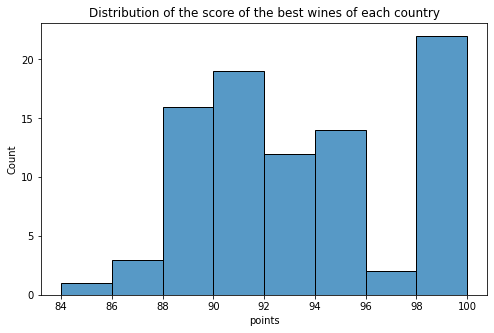

In [47]:
plt.figure(figsize = (8,5))
sns.histplot(x = 'points', data = best_wine)
plt.title("Distribution of the score of the best wines of each country")
plt.show()

Most of the wines of the selection received between 88 and 92, and more than 20 wines had the highest score. The minimum is 84. Then these wines are actually pretty good.

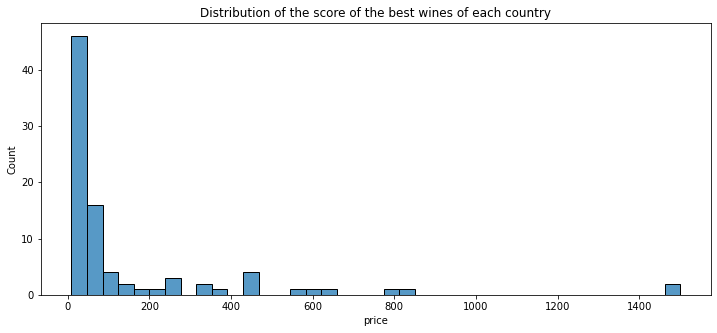

In [48]:
plt.figure(figsize = (12,5))
sns.histplot(x = 'price', data = best_wine)
plt.title("Distribution of the score of the best wines of each country")
plt.show()

The prices of these wines are pretty various. Most of the wines costs less than 100, but it's also possible to find more expensive wines. So this selection could satisfy everyone.

Let's see now the varieties, vineyards and wineries of the wines included in this selection:

In [49]:
var = best_wine.variety.unique()
print(var)
print(var.shape)

['Malbec' 'Rosé' 'Muscat' 'Welschriesling' 'Blatina' 'Chardonnay'
 'Sparkling Blend' 'Red Blend' 'Bordeaux-style Red Blend' 'Riesling'
 'Syrah' 'Cabernet Blend' 'Plavac Mali' 'Teran' 'Xinisteri' 'Xynisteri'
 'Ryzlink Rýnský' 'Grenache' 'Bordeaux-style White Blend'
 'Champagne Blend' 'Rkatsiteli' 'Moschofilero' 'Assyrtiko' 'White Blend'
 'Shiraz' 'Cabernet Sauvignon' 'Prugnolo Gentile' 'Sangiovese'
 'Sangiovese Grosso' 'Merlot' 'Syrah-Cabernet Sauvignon'
 'Rhône-style Red Blend' 'Auxerrois' 'Vranec' 'Portuguese Red' 'Port'
 'Sauvignon Blanc' 'Tinto Fino' 'Pinot Noir-Gamay' 'Chasselas' 'Okuzgozu'
 'Tannat']
(42,)


There are 42 varieties in the selection, so it's pretty diversified.

In [50]:
vin = best_wine.designation.unique()
print(vin)
print(vin.shape)

['Nicasia Vineyard' 'Estate Bottled' 'Rare'
 'Zwischen den Seen Nummer 9 Trockenbeerenauslese' nan
 'Blanc de Blancs Brut' 'Brut Nature' 'Grande Cuvée' 'CR'
 "Butterfly's Rock" 'Collection' 'Riesling Icewine' 'Portfolio'
 'Cuvée Classique' 'Clos Apalta' 'Caballo Loco Number Sixteen'
 'Noble Dragon' 'Ambra' "Reuben's Private Reserve" 'Terra Mare'
 'St. Nicholas' 'Alasia Dessert Wine' 'Roucí' 'Caspar Blanc de Noirs'
 'Three Graces' 'Blanc de Blancs' 'The Trouble with Dreams' 'Brut'
 'Cristal Vintage Brut' 'Le Mesnil Blanc de Blancs Brut'
 'Qvevri Traditional Kakhuri Dry Unfiltered Amber Wine'
 'Kiedrich Gräfenberg Trockenbeerenauslese' 'Kavalieros Single Vineyard'
 '6 Puttonyos Aszú Gold Label' 'Dindori Reserve' 'Reserve David Vineyard'
 'Occhio di Pernice' 'Riserva' 'Cerretalto' 'Masseto' 'Reserve du Couvent'
 'Gaston Hochar' 'Altitudes' 'Grande Réserve' 'Grande Reserve' 'El'
 'Terrasses de Baalbeck' 'Bech-Kleinmacher Naumberg Grand Premier Cru'
 'Veritas' 'Amado IV' 'Freedom Blend' 'Mé

In [51]:
win = best_wine.winery.unique()
print(win)
print(win.shape)

['Bodega Catena Zapata' 'Van Ardi' 'Chambers Rosewood Vineyards' 'Kracher'
 'Winery Čitluk' 'Cave Geisse' 'Bessa' 'Castra Rubra' 'Chateau Burgozone'
 'Cave Spring' 'Laughing Stock' 'Le Vieux Pin' 'Lapostolle' 'Valdivieso'
 'Chateau Changyu-Castel' 'Bibich' 'Korta Katarina' 'Trapan' 'Etko' 'Loel'
 'Tsiakkas' 'Sonberk' 'Stapleton & Springer' 'Sahara Vineyards'
 'Chapel Down' 'Nyetimber' 'Sugrue Pierre Ltd.' 'Château Cheval Blanc'
 'Château Haut-Brion' 'Château Lafite Rothschild'
 'Château Léoville Barton' 'Château Léoville Las Cases' 'Krug'
 'Louis Roederer' 'Salon' 'Alaverdi Monastery Cellar' 'Robert Weil'
 'Dionysos' 'Domaine Sigalas' 'Royal Tokaji' 'Sula' 'Recanati'
 'Avignonesi' 'Biondi Santi' 'Casanova di Neri' "Tenuta dell'Ornellaia"
 'Château Ksara' 'Château Musar' 'Ixsir' 'Massaya' 'Domaines Vinsmoselle'
 'Stobi' 'Viñas de Garza' 'Purcari' 'Ouled Thaleb' 'Squawking Magpie'
 'Trinity Hill' 'Intipalka' 'Tacama' 'Casa Ferreirinha' 'Quinta do Noval'
 'Cramele Recas' 'Budimir' 'Châtea

Vineyards and wineries are also pretty diversified.

In conclusion, by choosing the best wines of each country the selection for the marketplace would be quite diversified in: product origin, price of a bottle, varieties, vineyards and wineries. <br> It should then satisfy everyone's demands and give the opportunity to the buyers to try differents types of wines, while remaining accessible to everyone. Moreover it would give the opportunity to the countries to promote their wines all over the world, especially to the ones that have a little but still good production and that usually can not compete with the largest  and most famous wine producers.